# What's new in v1

# 1 creat_agent
from langchain.agents import create_agent       
creat_agent 是 v1.0版本 构建 Agent 的标准方法，同时通过使用中间件 middleware 提供了更大的自定义潜力。       
这个接口是通过简单的 agent loop  实现的：唤起模型--》挑选工具并执行直到 不再挑选        
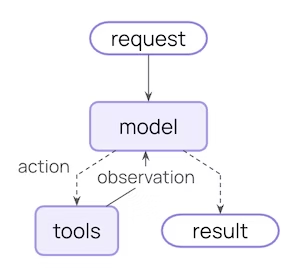

## 1.1 Middleware
Middleware is the defining feature of create_agent.     
提供了一个可高度自定义的入口。      
好的 Agent 需要 **context engineering**：getting the right information to the model at the right time.      
Middleware helps you control **dynamic prompts, conversation summarization, selective tool access, state management, and guardrails** through a composable abstraction.
## 1.2 Prebuilt middleware
LangChain提供了一些 预构建的 中间件 for common patterns，包括：
- PIIMiddleware:发送给模型前，敏感信息编辑
- SummarizationMiddleware: 对话过长时，进行精要总结
- HumanInTheLoopMiddleware: Require approval for sensitive tool calls，指调用用户本地一些敏感工具时要获取允许
````py
middleware=[
        PIIMiddleware("email", strategy="redact", apply_to_input=True),
        PIIMiddleware(
            "phone_number",
            detector=(
                r"(?:\+?\d{1,3}[\s.-]?)?"
                r"(?:\(?\d{2,4}\)?[\s.-]?)?"
                r"\d{3,4}[\s.-]?\d{4}"
			),
			strategy="block"
        ),
        SummarizationMiddleware(
            model="claude-sonnet-4-5-20250929",
            max_tokens_before_summary=500
        ),
        HumanInTheLoopMiddleware(
            interrupt_on={
                "send_email": {
                    "allowed_decisions": ["approve", "edit", "reject"]
                }
            }
        ),
]
````
## 1.3 Custom middleware
Middleware exposes hooks at each step in an agent’s execution: 怎么样的 hook 呢？       
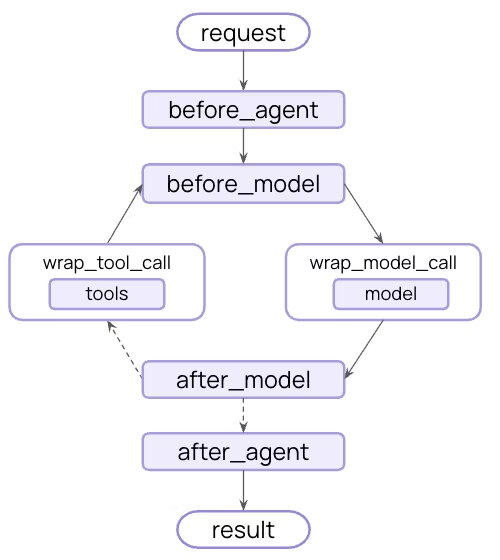      
实现任意图中的 hooks 通过 实现 AgentMiddleware 的 子类。不同hook 执行时机 如名。参考一下官方的一张表：      
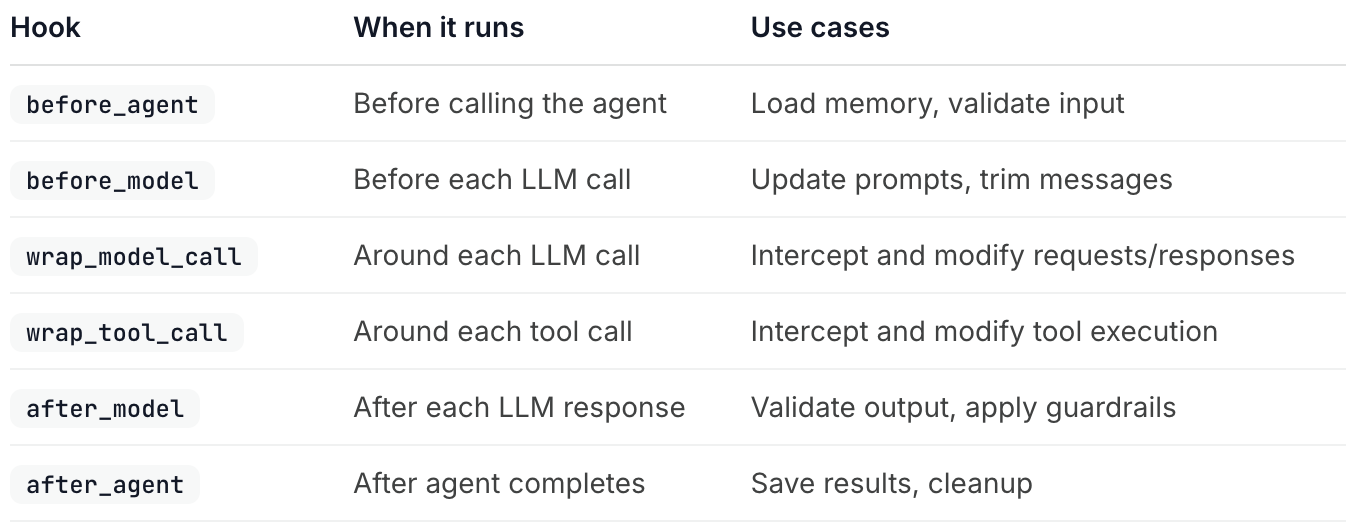

## 1.4 Built on LangGraph
LangGraph 成为默认运行时​：1.0 的 Agent 运行在 ​LangGraph​ 之上，具备状态持久化​（GraphState）、流程控制​（条件边、循环控制、最大步数）、异常恢复​（工具失败转入 error 节点）、可观测性​（tracing，支持 ​LangSmith），并提供人机协同与流式处理等企业级能力，增强复杂流程的稳定性与可调试性。

## 1.5 Structured output
from langchain.agents.structured_output import ToolStrategy


# 2 standard content blocks
为 ​AIMessage​ 引入 ​.content_blocks: List[ContentBlock]​，将文本、工具调用、引用、图像等多类型输出统一为类型化块，屏蔽不同供应商差异，并支持如 ​ImageBlock​ 的懒加载，便于程序精确消费与多模态扩展。
# 3 simplified namesapces
对 包的命名进行了 简化，传统的包 放入了langchain-classic 中：

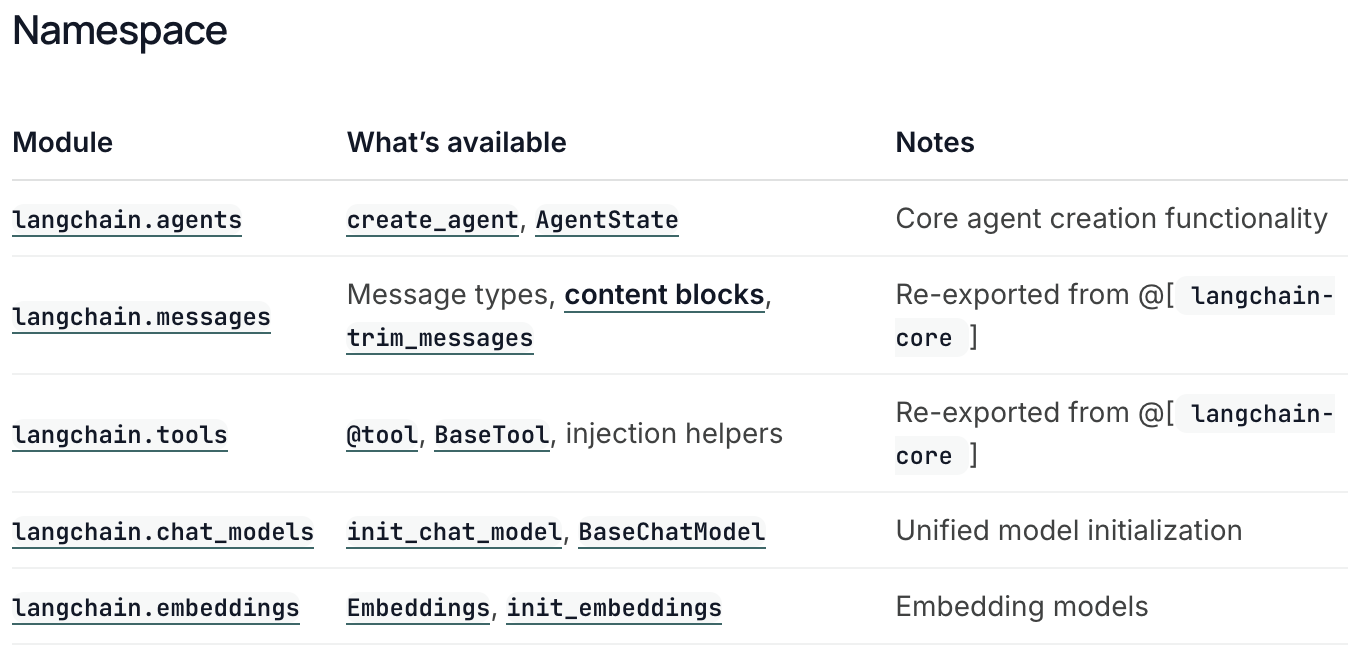